<a href="https://colab.research.google.com/github/Papekyan/Data-Science-Project/blob/main/!Finance_calculations_colored.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial Analysis
Financial Analysis of Volatile Stocks

This notebook demonstrates how to analyze the historical prices of volatile stocks using Python.
 We will:
 1. Import the necessary libraries for financial data analysis
 2. Download historical stock data using yfinance
 3. Clean and prepare the data for analysis



# 1. Importing Libraries
 We need pandas for data handling, matplotlib for plotting, and yfinance for fetching stock data.


In [ ]:
!pip install yfinance pandas matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

## 2. Downloading Stock Data


/tmp/ipython-input-2-2389898042.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start='2010-01-01', end='2024-01-09')
[*********************100%***********************]  4 of 4 completed


Ticker          AAPL       MSFT      NVDA  TSLA
Date                                           
2010-01-04  6.431896  23.211441  0.423854   NaN
2010-01-05  6.443018  23.218935  0.430043   NaN
2010-01-06  6.340533  23.076443  0.432794   NaN
2010-01-07  6.328810  22.836452  0.424313   NaN
2010-01-08  6.370886  22.993954  0.425230   NaN


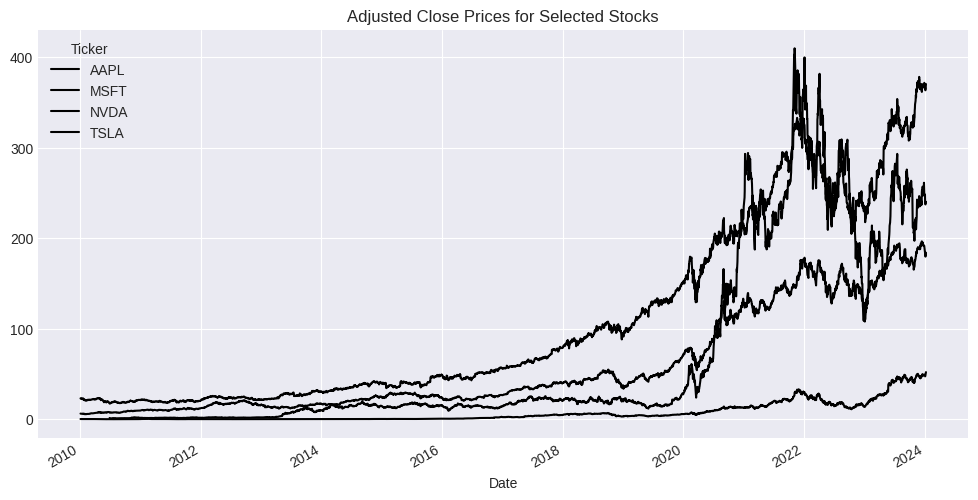

In [ ]:


# Styling
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

# 5 volatile stocks
stocks = ['TSLA', 'NVDA', 'MSFT', 'AAPL',]

stock_colors = {
    'TSLA': '#E31937',   # Tesla Red
    'NVDA': '#76B900',   # Nvidia Green
    'MSFT': '#00A4EF',   # Microsoft Blue
    'AAPL': '#555555'    # Apple Grey
}

# Download adjusted data (which is now in the 'Close' column!)
data = yf.download(stocks, start='2010-01-01', end='2024-01-09')

# Use the 'Close' column — it's already adjusted
adj_close = data['Close']

# Extract just the closing prices
close_prices = data['Close']

# Preview
print(adj_close.head())

# Show the first few rows to understand the structure
data.head()

# Plotting
adj_close.plot(title='Adjusted Close Prices for Selected Stocks', color='k')

plt.show()


### Data Cleaning and Preparation

Now let's clean and prepare our data:
1. Extract and convert dates to a proper datetime format
2. Convert ratings to numeric values
3. Remove records with missing values
4. Focus on a specific time period

Missing values per stock:
Price   Ticker
Close   AAPL        0
        MSFT        0
        NVDA        0
        TSLA      122
High    AAPL        0
        MSFT        0
        NVDA        0
        TSLA      122
Low     AAPL        0
        MSFT        0
        NVDA        0
        TSLA      122
Open    AAPL        0
        MSFT        0
        NVDA        0
        TSLA      122
Volume  AAPL        0
        MSFT        0
        NVDA        0
        TSLA      122
dtype: int64
Any missing values left? True


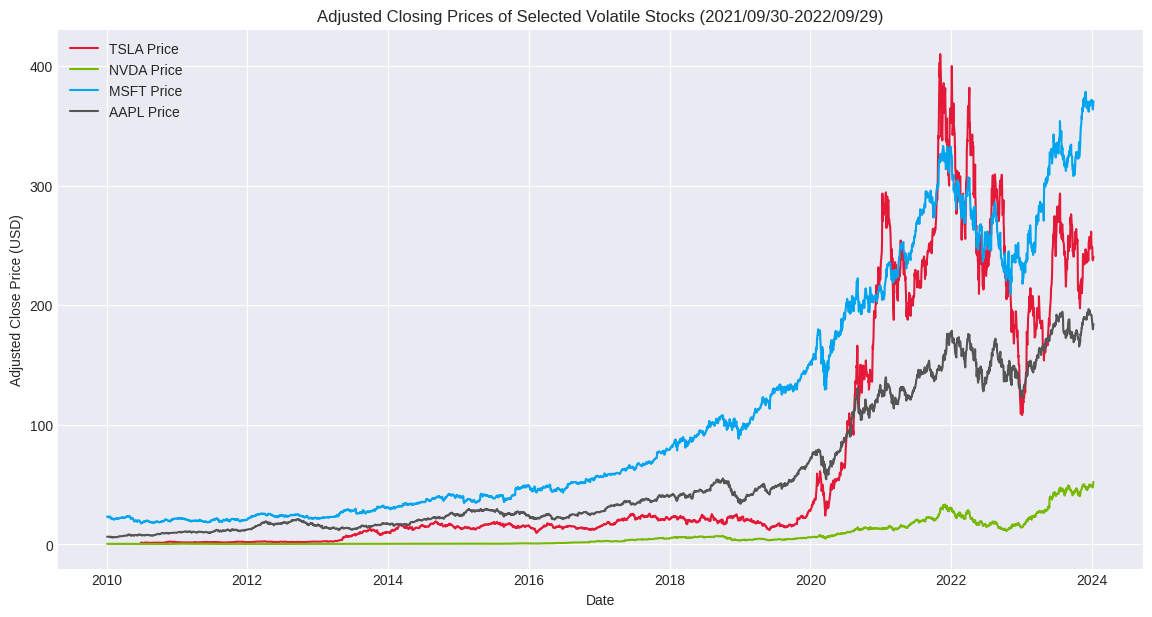

In [ ]:
# 3. Cleaning and Preparing the Data
# - Check for missing values
# - Forward-fill missing data (common in stock data due to market holidays)
# - Set the date as the index (already done by yfinance)



# Check for missing values
print('Missing values per stock:')
print(data.isnull().sum())

# Extract only the adjusted closing prices
close_prices = data['Close']

# Fill missing values (new syntax)
close_prices = close_prices.ffill()

# Check again
print('Any missing values left?', close_prices.isnull().any().any())


# Plot config
plt.figure(figsize=(14, 7))
for stock in stocks:
  plt.plot(close_prices.index, close_prices[stock], label=f'{stock} Price', color=stock_colors[stock])
plt.title('Adjusted Closing Prices of Selected Volatile Stocks (2021/09/30-2022/09/29)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()

#extract plot, and plot it
plt.savefig('plotted-pricesonly.png',
dpi=300, bbox_inches='tight', facecolor='white')
plt.show()



# Now the data is ready for further financial analysis, such as calculating returns, volatility, or building predictive models.

## 3. Calculating financial measures

1. Calculate daily returns for each stock

2. Calculate Bollinger Bands

3. Calculate RSI (Relative Strength Index)

4. Calculate MACD (Moving Average Convergence Divergence)

5. Simple Price Prediction (Moving Average Forecast)


First 5 rows of daily returns:
Ticker          AAPL      MSFT      NVDA  TSLA
Date                                          
2010-01-04       NaN       NaN       NaN   NaN
2010-01-05  0.001729  0.000323  0.014602   NaN
2010-01-06 -0.015906 -0.006137  0.006397   NaN
2010-01-07 -0.001849 -0.010400 -0.019597   NaN
2010-01-08  0.006648  0.006897  0.002161   NaN

--- TSLA ---


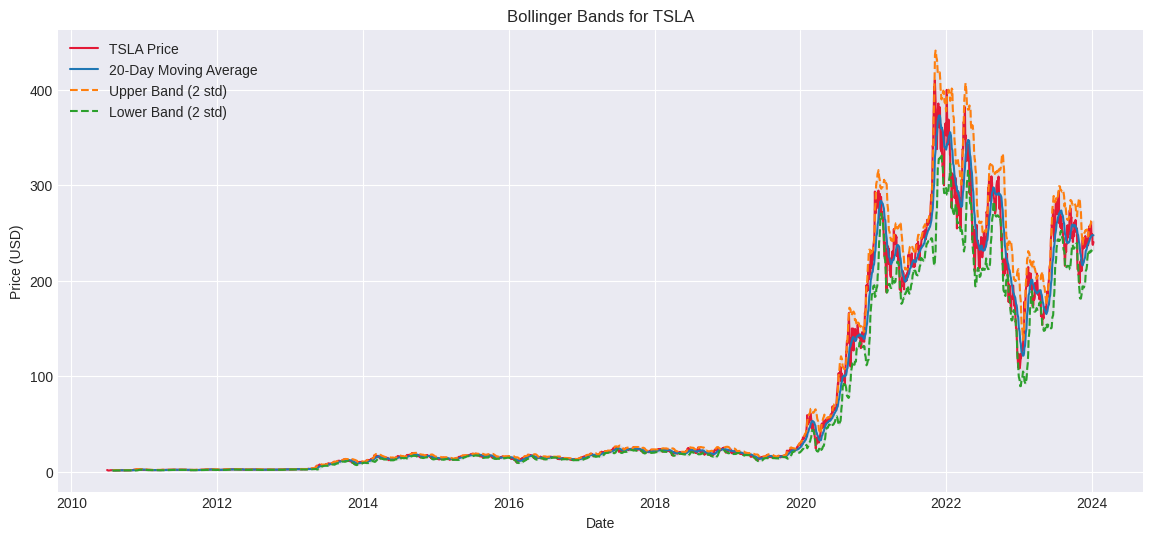

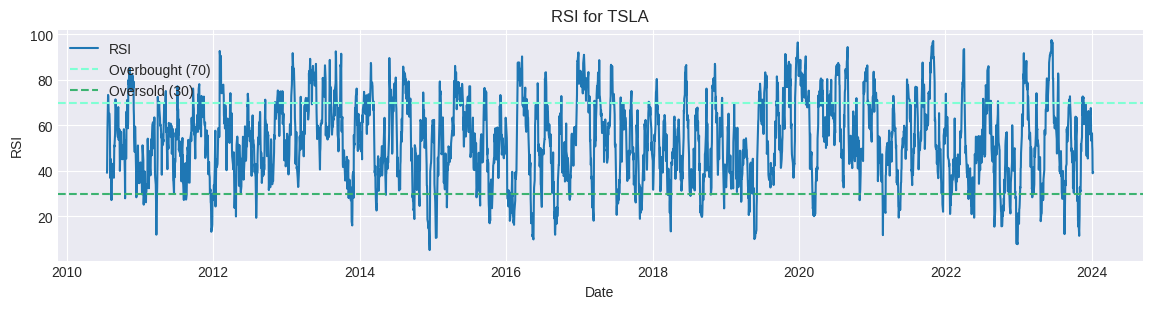

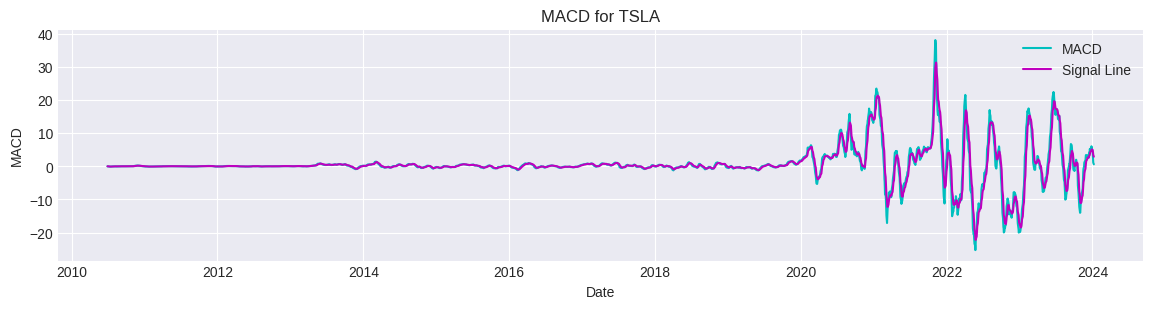

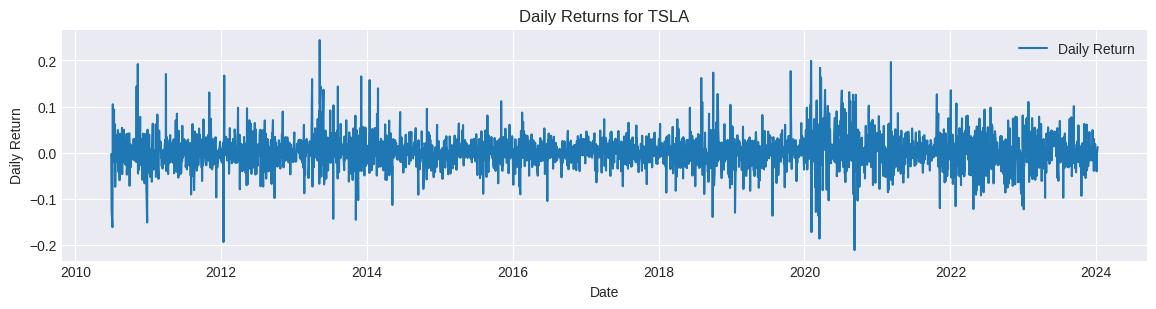


--- NVDA ---


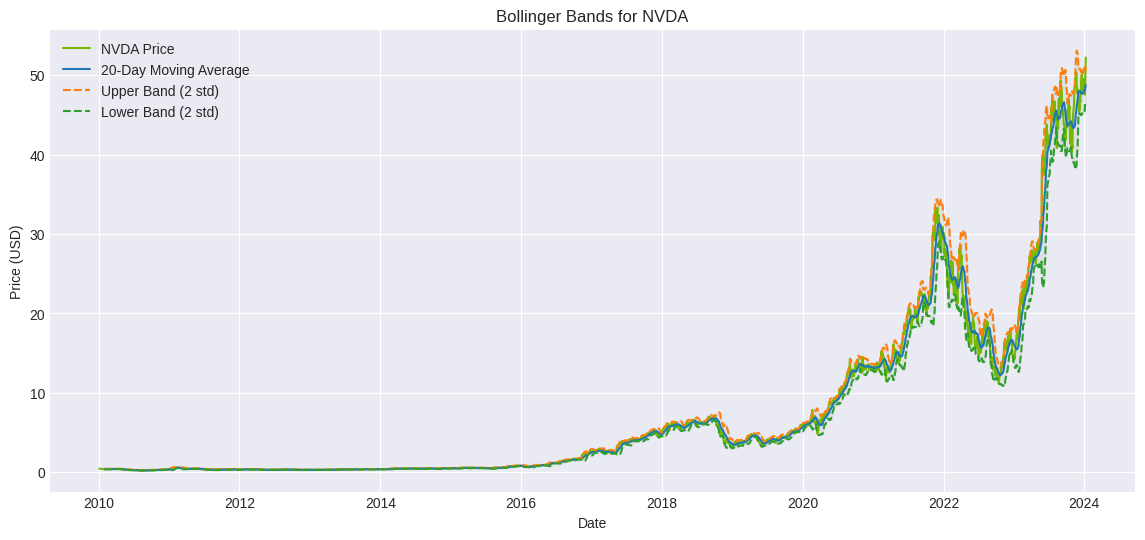

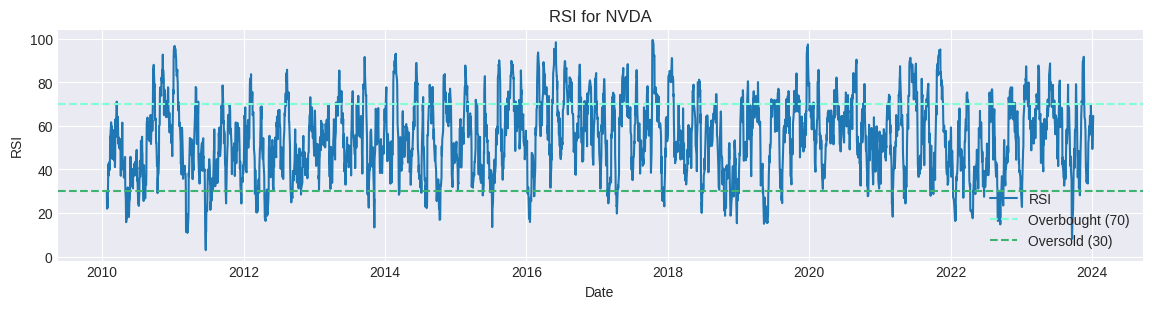

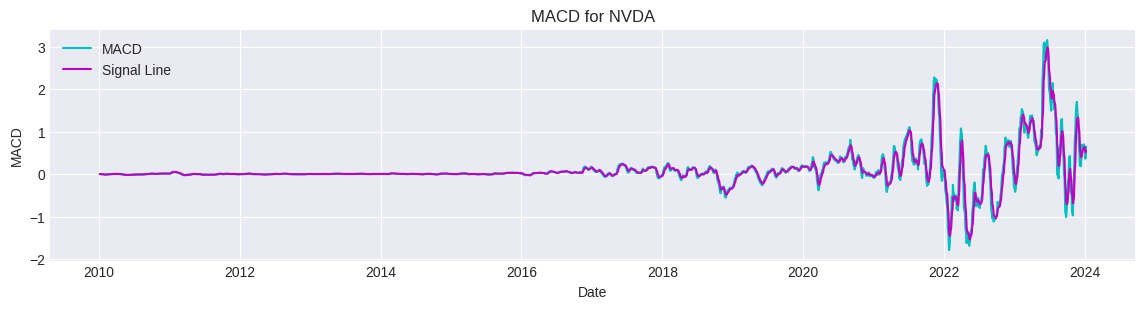

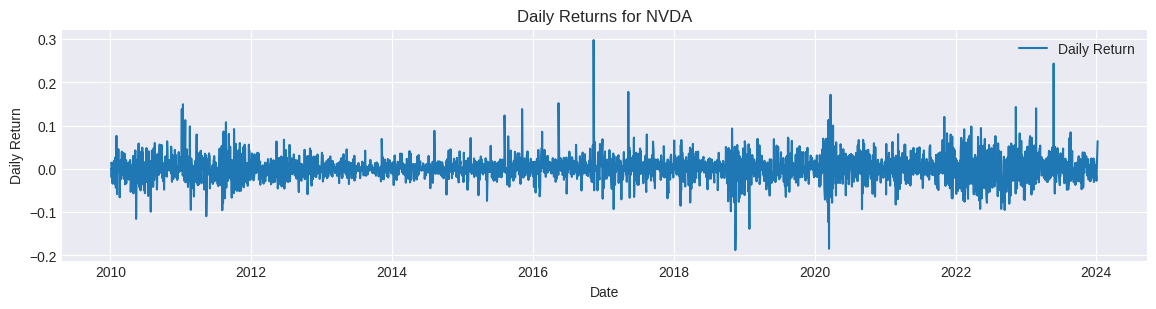


--- MSFT ---


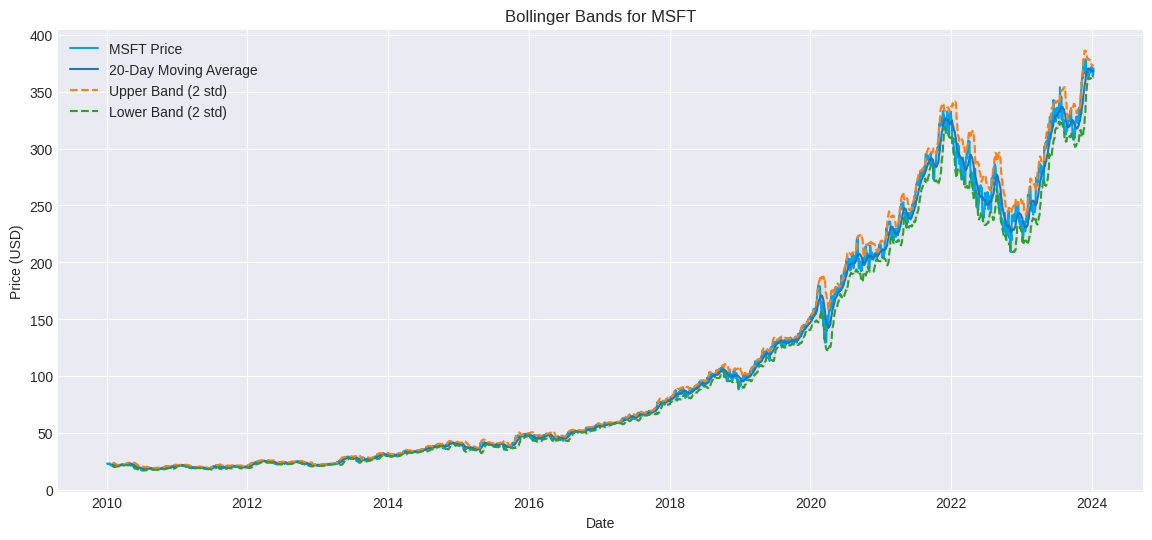

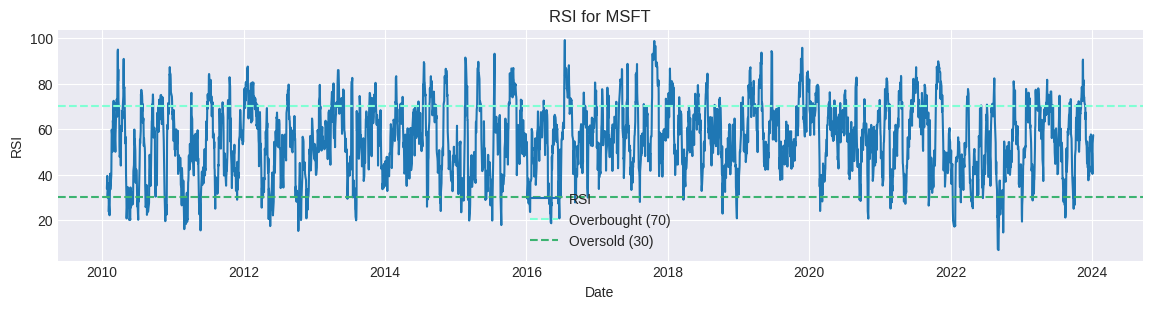

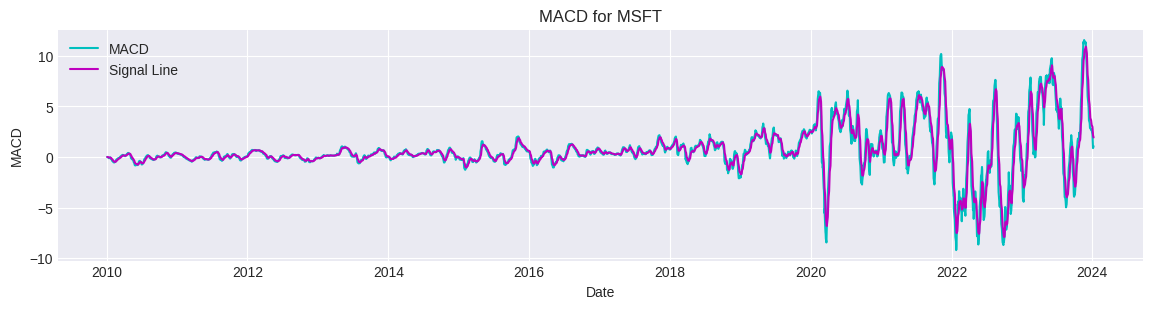

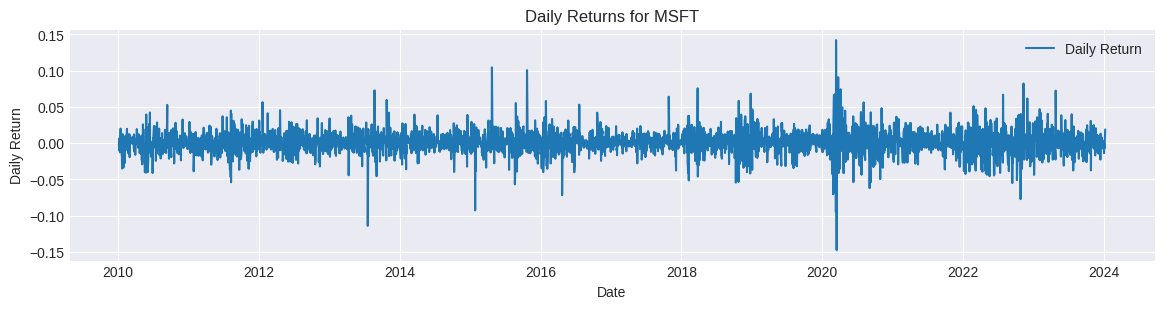


--- AAPL ---


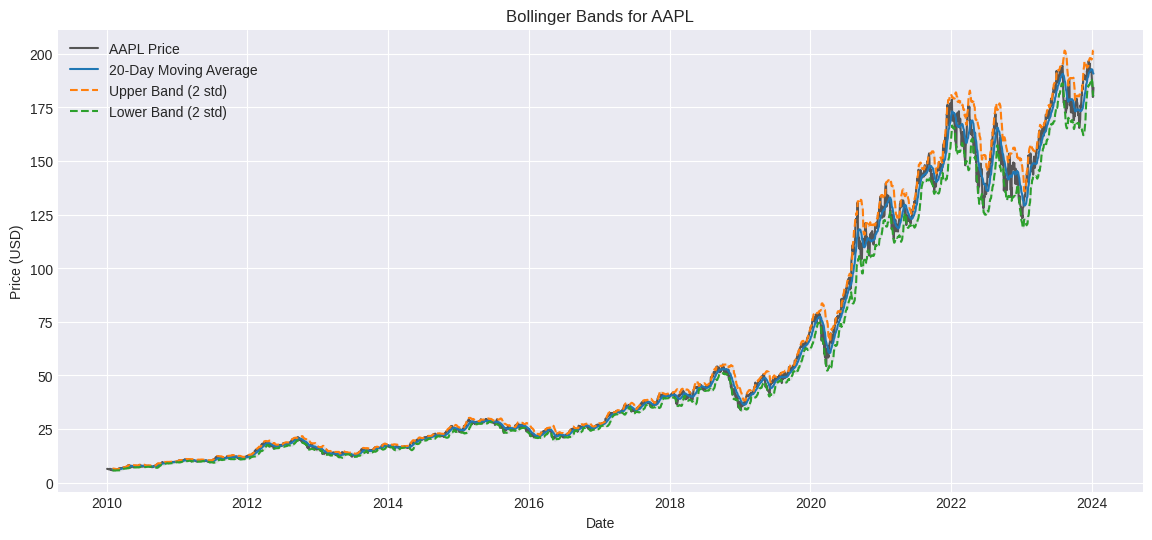

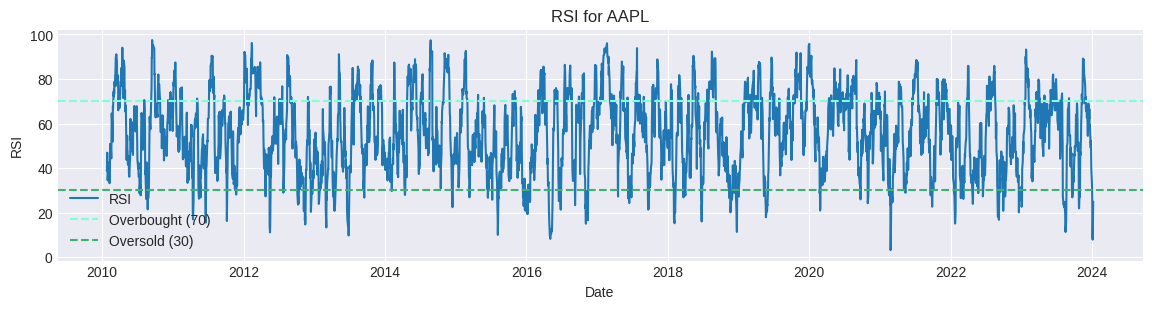

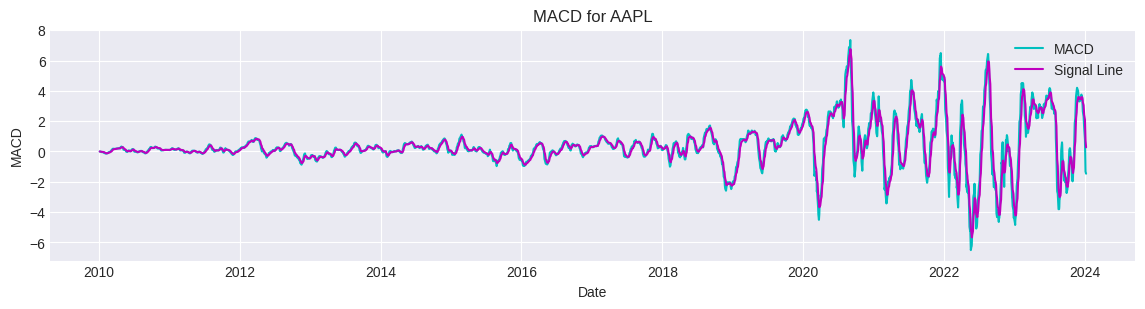

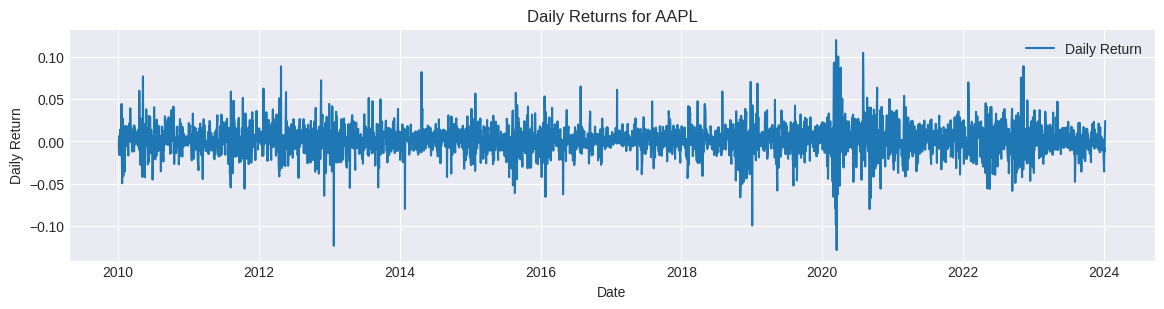


All calculations and plots are complete for both stocks!
- Daily returns show how much the price changes each day.
- Bollinger Bands help visualise if a stock's price is high or low compared to its recent average.
- RSI shows if a stock is overbought (>70) or oversold (<30).
- MACD helps spot trend changes.



In [ ]:

# 1. Calculate Daily Returns (for closing prices only)
returns = close_prices.pct_change()
print("First 5 rows of daily returns:")
print(returns.head())

# 2. Define RSI calculation function
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


# 3. Loop through each stock and calculate/plot all measures
for stock in stocks:
  print(f"\n--- {stock} ---")

  # --- Bollinger Bands ---
  window = 20
  rolling_mean = close_prices[stock].rolling(window).mean()
  rolling_std = close_prices[stock].rolling(window).std()
  upper_band = rolling_mean + (rolling_std * 2)
  lower_band = rolling_mean - (rolling_std * 2)
  plt.figure(figsize=(14, 6))
  plt.plot(close_prices[stock], label=f'{stock} Price', color=stock_colors[stock])
  plt.plot(rolling_mean, label='20-Day Moving Average')
  plt.plot(upper_band, label='Upper Band (2 std)', linestyle='--')
  plt.plot(lower_band, label='Lower Band (2 std)', linestyle='--')
  plt.fill_between(close_prices.index, lower_band, upper_band, color='gray', alpha=0.1)
  plt.title(f'Bollinger Bands for {stock}')
  plt.xlabel('Date')
  plt.ylabel('Price (USD)')
  plt.legend()
    #extract plot, and plot it
  plt.savefig(f'plotted-BollingerBands-{stock}.png', dpi=300, bbox_inches='tight', facecolor='white')

  plt.show()

  # --- RSI ---
  rsi = compute_rsi(close_prices[stock])
  plt.figure(figsize=(14, 3))
  plt.plot(rsi, label='RSI')
  plt.axhline(70, color='aquamarine', linestyle='--', label='Overbought (70)')
  plt.axhline(30, color='mediumseagreen', linestyle='--', label='Oversold (30)')
  plt.title(f'RSI for {stock}')
  plt.xlabel('Date')
  plt.ylabel('RSI')
  plt.legend()
    #extract plot, and plot it
  plt.savefig(f'plotted-RSI-{stock}.png', dpi=300, bbox_inches='tight', facecolor='white')

  plt.show()

  # --- MACD ---
  exp1 = close_prices[stock].ewm(span=12, adjust=False).mean()
  exp2 = close_prices[stock].ewm(span=26, adjust=False).mean()
  macd = exp1 - exp2
  signal = macd.ewm(span=9, adjust=False).mean()
  plt.figure(figsize=(14, 3))
  plt.plot(macd, label='MACD', color='c')
  plt.plot(signal, label='Signal Line', color='m')
  plt.title(f'MACD for {stock}')
  plt.xlabel('Date')
  plt.ylabel('MACD')
  plt.legend()
    #extract plot, and plot it
  plt.savefig(f'plotted-MACD-{stock}.png', dpi=300, bbox_inches='tight', facecolor='white')

  plt.show()

  # --- Daily Returns Plot ---
  plt.figure(figsize=(14, 3))
  plt.plot(returns[stock], label='Daily Return')
  plt.title(f'Daily Returns for {stock}')
  plt.xlabel('Date')
  plt.ylabel('Daily Return')
  plt.legend()
    #extract plot, and plot it
  plt.savefig(f'plotted-Dailyreturns-{stock}.png', dpi=300, bbox_inches='tight', facecolor='white')

  plt.show()




print("""
All calculations and plots are complete for both stocks!
- Daily returns show how much the price changes each day.
- Bollinger Bands help visualise if a stock's price is high or low compared to its recent average.
- RSI shows if a stock is overbought (>70) or oversold (<30).
- MACD helps spot trend changes.
""")